In [1]:
import numpy as np
from numpy import linalg
import scipy as sp
import matplotlib
from matplotlib import pyplot as pl

%matplotlib notebook

In [2]:
def bands_calc(q, V0, nmodes):
    
    # V(x) = (V0/2) cos(2 k_l x)
    # E_r = k_l^2/2m = pi^2/2ma^2
    
    dim = 2*nmodes + 1
    
    mat = np.zeros((dim, dim), dtype='float64')
    
    for i in range(dim):
        n = i-nmodes
        mat[i,i] = (q+2*n)**2
        
    for i in range(dim-1):
        mat[i,i+1] = V0/4
        mat[i+1,i] = V0/4
    
    return mat

def uq(x,cn,nmodes):
    dim = 2*nmodes + 1
    uqval = 0.
    for i in range(dim):
        n = i-nmodes
        uqval += cn[i]*np.exp(1j*2*np.pi*n*x)
    return uqval

In [4]:
mat = bands_calc(0,1,4)

In [5]:
print(mat)

[[64.    0.25  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.25 36.    0.25  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.25 16.    0.25  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.25  4.    0.25  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.25  0.    0.25  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.25  4.    0.25  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.25 16.    0.25  0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.25 36.    0.25]
 [ 0.    0.    0.    0.    0.    0.    0.    0.25 64.  ]]


In [6]:
qlist = np.linspace(-1.,1.,101)

In [9]:
V0 = 5
nmodes = 14
eigs_list = []

for q in qlist:
    w, v = np.linalg.eigh(bands_calc(q,V0,nmodes))
    eigs_list.append(w)

<IPython.core.display.Javascript object>


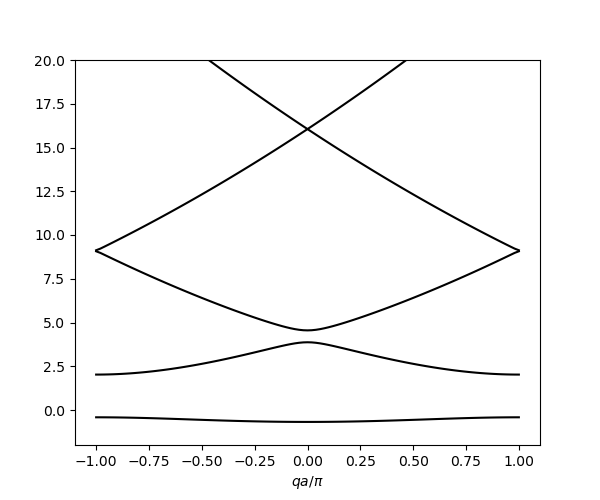

In [10]:
pl.figure(figsize=(6,5))
pl.plot(qlist, eigs_list, 'k')
pl.ylim([-2,20])
pl.xlabel('$qa/\pi$')
pl.show()

In [19]:
V0 = 5
q = 0.
w, v = np.linalg.eigh(bands_calc(q,V0,nmodes))

In [20]:
v[:,0] # n = 0

array([-8.36864220e-30,  5.23194911e-27, -2.82292277e-24,  1.29906906e-21,
       -5.02830686e-19,  1.61010742e-16, -4.18006893e-14,  8.58219897e-12,
       -1.35032416e-09,  1.56284661e-07, -1.25865947e-05,  6.51136817e-04,
       -1.90950108e-02,  2.54171415e-01, -9.32772050e-01,  2.54171415e-01,
       -1.90950108e-02,  6.51136817e-04, -1.25865947e-05,  1.56284661e-07,
       -1.35032416e-09,  8.58217050e-12, -4.17942697e-14,  1.60903813e-16,
       -5.01958690e-19,  1.29451469e-21, -2.80583191e-24,  5.18279438e-27,
       -8.25568027e-30])

In [21]:
v[:,1] # n = 1 (-1)

array([ 4.59368156e-29, -2.86915313e-26,  1.54371896e-23, -7.06901264e-21,
        2.71612272e-18, -8.60915580e-16,  2.20502041e-13, -4.44764118e-11,
        6.83595835e-09, -7.66290183e-07,  5.89235390e-05, -2.83366046e-03,
        7.27759863e-02, -7.03346019e-01, -1.11742093e-16,  7.03346019e-01,
       -7.27759863e-02,  2.83366046e-03, -5.89235390e-05,  7.66290183e-07,
       -6.83595835e-09,  4.44763813e-11, -2.20507614e-13,  8.61017178e-16,
       -2.71697658e-18,  7.07354031e-21, -1.54543362e-23,  2.87411497e-26,
       -4.60513463e-29])

In [22]:
# Lowest (1st) band
xlist = np.linspace(-1,1,101)
uqxlist = [uq(x,v[:,0],nmodes) for x in xlist]

<IPython.core.display.Javascript object>


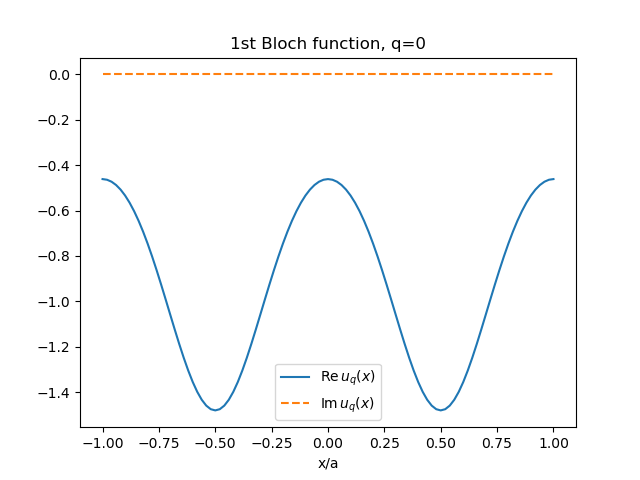

In [23]:
pl.figure()
pl.plot(xlist, np.real(uqxlist), label='$\mathrm{Re}\, u_q(x)$')
pl.plot(xlist, np.imag(uqxlist),'--',  label='$\mathrm{Im}\, u_q(x)$')
pl.xlabel('x/a')
pl.title('1st Bloch function, q=0')
pl.legend()
pl.show()

In [24]:
# Second (2nd) band
xlist = np.linspace(-1,1,101)
uqxlist = [uq(x,v[:,1],nmodes) for x in xlist]

<IPython.core.display.Javascript object>


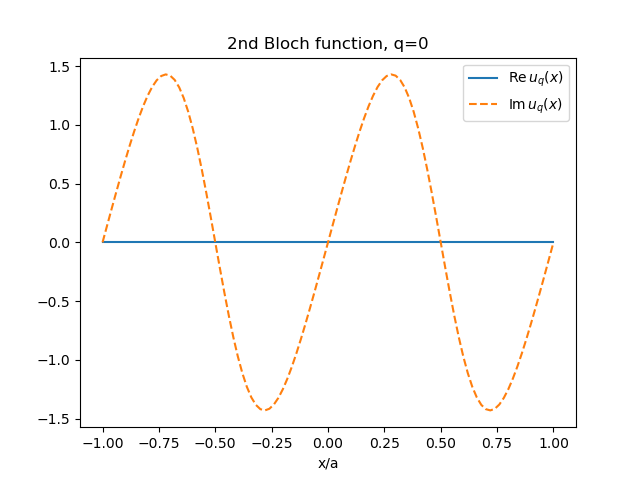

In [25]:
pl.figure()
pl.plot(xlist, np.real(uqxlist), label='$\mathrm{Re}\, u_q(x)$')
pl.plot(xlist, np.imag(uqxlist),'--',  label='$\mathrm{Im}\, u_q(x)$')
pl.xlabel('x/a')
pl.title('2nd Bloch function, q=0')
pl.legend()
pl.show()